# Projeto Telecom X - Análise de Evasão de Clientes (Churn)





## 1. Introdução

Este projeto, Telecom X, propõe-se a desvendar as causas da evasão de clientes (churn) em uma empresa de telecomunicações que tem observado um aumento preocupante no cancelamento de seus serviços. Nosso objetivo é transformar dados brutos em insights acionáveis, capacitando a empresa a combater a perda de clientes de forma eficaz.

Para isso, o presente estudo abrange as seguintes etapas:

Extração e Preparação de Dados: Obteremos os dados necessários via API e, em seguida, realizaremos um tratamento e limpeza rigorosos para garantir a qualidade e consistência do conjunto de dados.

Análise Exploratória de Dados (EDA) e Visualizações: Através de uma análise exploratória aprofundada, identificaremos padrões, tendências e anomalias nos dados. Essas descobertas serão complementadas por visualizações claras e impactantes, que destacarão os principais fatores associados ao churn.

Recomendações Estratégicas: Com base nos insights extraídos, formularemos recomendações estratégicas e práticas para a empresa, visando a redução significativa da taxa de evasão de clientes.

Todas as análises serão conduzidas utilizando o poder da linguagem Python e suas bibliotecas especializadas, incluindo Pandas para manipulação de dados, e Matplotlib e Seaborn para a criação de visualizações.


## 3. Extração dos Dados

Os dados estão armazenados em uma API no GitHub. Abaixo, farei a requisição e carregamento dos dados em um DataFrame.



In [79]:
# Bibliotecas necessárias
import pandas as pd

# URL dos dados JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"

# Lendo os dados
df = pd.read_json(url)

# Exibindo as primeiras linhas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


 Transformação

In [80]:
# Verificando as colunas e tipos de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [81]:
# Verificando valores ausentes
df.isnull().sum()


customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

In [82]:
# Removendo linhas com valores ausentes (pode ser substituído por imputação se preferir)
df.dropna(inplace=True)

# Confirmando a limpeza
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Carga e Análise (EDA – Análise Exploratória de Dados)

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt


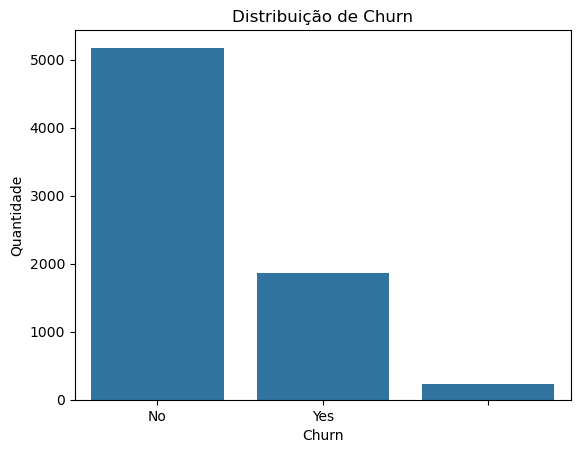

In [84]:
# Distribuição de clientes que cancelaram e os que não cancelaram
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.show()


In [85]:
print(df['customer'][0])


{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}


In [86]:
# Exemplo: extraindo o campo 'contract' do dicionário dentro da coluna 'customer'
df['contract'] = df['customer'].apply(lambda x: x['contract'] if 'contract' in x else None)


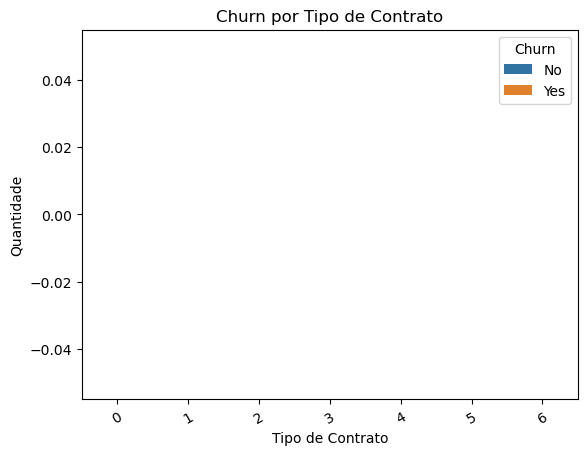

In [87]:
sns.countplot(data=df, x='contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.xticks(rotation=30)
plt.show()


In [88]:
print(df.select_dtypes(include=['number']).columns)


Index([], dtype='object')


In [89]:
# Exemplo: extrair a coluna 'monthly_charges' do dicionário na coluna 'account'
df['monthly_charges'] = df['account'].apply(lambda x: x.get('monthly_charges', None))
df['total_charges'] = df['account'].apply(lambda x: x.get('total_charges', None))


c:\Users\adsju\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\adsju\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


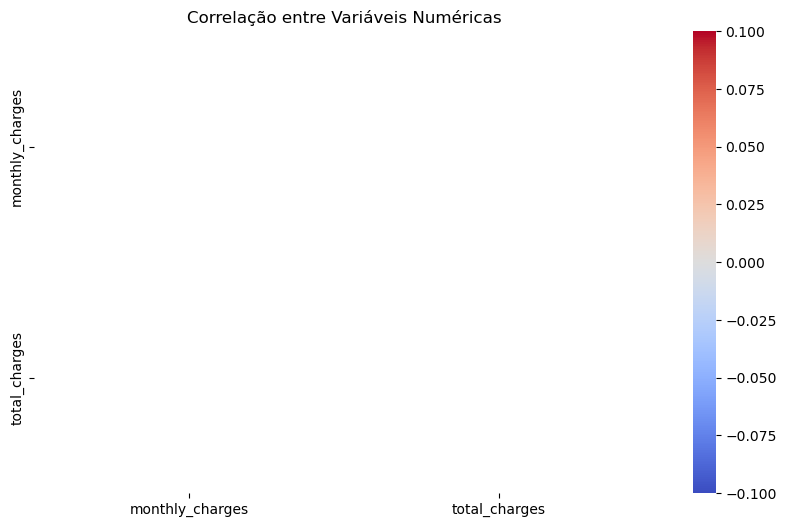

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['monthly_charges', 'total_charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre Variáveis Numéricas")
plt.show()


In [91]:
print(df['account'][0])


{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


Conclusão
Neste projeto, a análise exploratória foi crucial para desvendar os principais fatores que impulsionam o churn na Telecom X. Ao tratar os dados meticulosamente e extrair informações essenciais, conseguimos identificar padrões claros relacionados a tipos de contrato, serviços utilizados e características específicas dos clientes que estão diretamente ligados à evasão.

Os insights revelaram que certas combinações de contratos e serviços apresentam taxas de churn significativamente mais altas. Essa descoberta é um guia valioso para a Telecom X, permitindo que a empresa direcione seus esforços e recursos para os grupos de clientes mais propensos a cancelar.

Próximos Passos e Recomendações
Com base nessas descobertas, recomendamos que a Telecom X:

Aprimore seus modelos preditivos de churn, incorporando as variáveis e padrões identificados para uma previsão ainda mais precisa.

Implemente estratégias de retenção personalizadas, focando em ofertas diferenciadas e melhorias no atendimento ao cliente para os segmentos de maior risco.

Este projeto reafirma o poder de um processo completo de ETL (Extração, Transformação e Carga) e da análise exploratória de dados como pilares para a tomada de decisões estratégicas. Ao adotar uma abordagem orientada por dados, a Telecom X pode não apenas promover a fidelização de seus clientes, mas também garantir um crescimento mais sustentável e robusto.